In [ ]:
import numpy as np
import pandas as pd
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
path_img = '/content/drive/MyDrive/Tuto_seg/road_img/*'
path_mask = '/content/drive/MyDrive/Tuto_seg/road_mask/*'

data_path = pd.DataFrame([], columns=('img', 'mask'))

for img in glob(path_img):
   new_path_mask = '/content/drive/MyDrive/Tuto_seg/road_mask/'+img.split('/')[-1][:-3]+'png'
   data_path = data_path.append(pd.DataFrame([[img,
                                              new_path_mask]],
                                            columns=['img',
                                                    'mask']))

In [ ]:
data_path.head()

,img,mask
0,/content/drive/MyDrive/Tuto_seg/road_img/cente...,/content/drive/MyDrive/Tuto_seg/road_mask/cent...
0,/content/drive/MyDrive/Tuto_seg/road_img/cente...,/content/drive/MyDrive/Tuto_seg/road_mask/cent...
0,/content/drive/MyDrive/Tuto_seg/road_img/cente...,/content/drive/MyDrive/Tuto_seg/road_mask/cent...
0,/content/drive/MyDrive/Tuto_seg/road_img/cente...,/content/drive/MyDrive/Tuto_seg/road_mask/cent...
0,/content/drive/MyDrive/Tuto_seg/road_img/cente...,/content/drive/MyDrive/Tuto_seg/road_mask/cent...


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
test_x = cv2.imread(data_path.iloc[0, 0])
test_y = cv2.imread(data_path.iloc[0, 1])

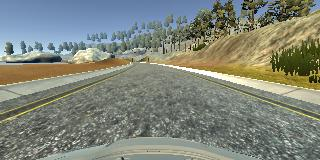

In [ ]:
cv2_imshow(test_x)

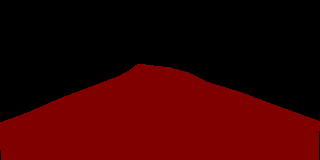

In [ ]:
cv2_imshow(test_y)

In [ ]:
X = np.array([cv2.imread(x[1][0]) for x in data_path.iterrows()])
Y = np.array([cv2.imread(x[1][1]) for x in data_path.iterrows()])

In [ ]:
np.unique(Y)

array([  0, 128], dtype=uint8)

In [ ]:
Y_1 = np.expand_dims(np.apply_along_axis(lambda x: np.any(x), 3, Y),axis=3)

In [ ]:
np.unique(Y_1)

array([False,  True])

In [ ]:
Y.shape

(202, 160, 320, 3)

In [ ]:
Y_1.shape

(202, 160, 320, 1)

In [ ]:
X.shape

(202, 160, 320, 3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ELU, Conv2DTranspose, Conv2D

In [ ]:
def base_model(image_size):

    model = Sequential()
    model.add(Conv2D(filters=32,
                kernel_size=(9, 9),
                name="conv1",
                activation=None,
                padding="valid",
                input_shape=image_size))
    model.add(ELU(alpha=1.0))
    model.add(Conv2DTranspose(filters=1,
                kernel_size=(9, 9),
                name="Tconv2",
                activation="sigmoid"))
    model.summary()
    return model

In [ ]:
model = base_model((160,320,3))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 152, 312, 32)      7808      
                                                                 
 elu (ELU)                   (None, 152, 312, 32)      0         
                                                                 
 Tconv2 (Conv2DTranspose)    (None, 160, 320, 1)       2593      
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x=X,
          y=Y_1,
          batch_size=32,
          epochs=200,
          verbose=1,
          shuffle=True)


Epoch 1/200
7/7 [==============================] - 28s 4s/step - loss: 12.7926 - accuracy: 0.5440
Epoch 2/200
7/7 [==============================] - 26s 4s/step - loss: 5.9078 - accuracy: 0.5262
Epoch 3/200
7/7 [==============================] - 26s 4s/step - loss: 4.3073 - accuracy: 0.5786
Epoch 4/200
7/7 [==============================] - 26s 4s/step - loss: 3.1302 - accuracy: 0.6348
Epoch 5/200
7/7 [==============================] - 27s 4s/step - loss: 2.4576 - accuracy: 0.6828
Epoch 6/200
7/7 [==============================] - 26s 4s/step - loss: 2.1205 - accuracy: 0.7141
Epoch 7/200
7/7 [==============================] - 26s 4s/step - loss: 1.8927 - accuracy: 0.7594
Epoch 8/200
7/7 [==============================] - 26s 4s/step - loss: 1.7568 - accuracy: 0.7622
Epoch 9/200
7/7 [==============================] - 27s 4s/step - loss: 1.6156 - accuracy: 0.7815
Epoch 10/200
7/7 [==============================] - 26s 4s/step - loss: 1.5117 - accuracy: 0.7912
Epoch 11/200
7/7 [==========

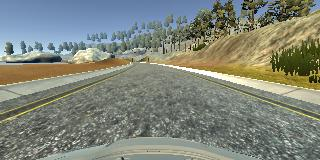

In [ ]:
cv2_imshow(X[0])

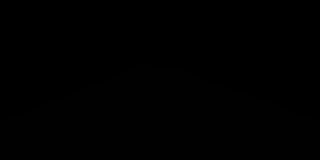

In [ ]:
cv2_imshow(Y_1[0])

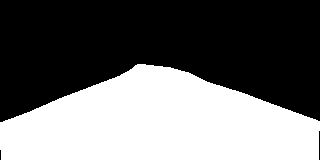

In [ ]:
test_y = np.where(Y_1[0] > 0, 255, 0)
cv2_imshow(test_y)

In [ ]:
test_pred = np.squeeze(model.predict(np.expand_dims(X[0], axis=0)))
test_pred.shape

(160, 320)

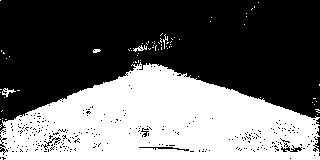

In [ ]:
test_pred = np.where(test_pred > 0.8, 255, 0)
cv2_imshow(test_pred)